In [3]:
import pandas as pd
import numpy as np
import pywt
from scipy.stats import median_absolute_deviation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
csv_file = '/home/srchand/Desktop/research/TVM_Intel_Fork/tvm/vta/sri_scripts/ro_uart_logs/working/resnet18_ro_with_6m_final.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file)
# # lendf = len(df)

# z_scores = stats.zscore(df['RO_VALUE'])
# threshold = 5

# df = df[(np.abs(z_scores) <= threshold)]
#df = df.tail(30000)
# df.reset_index(drop=True, inplace=True)



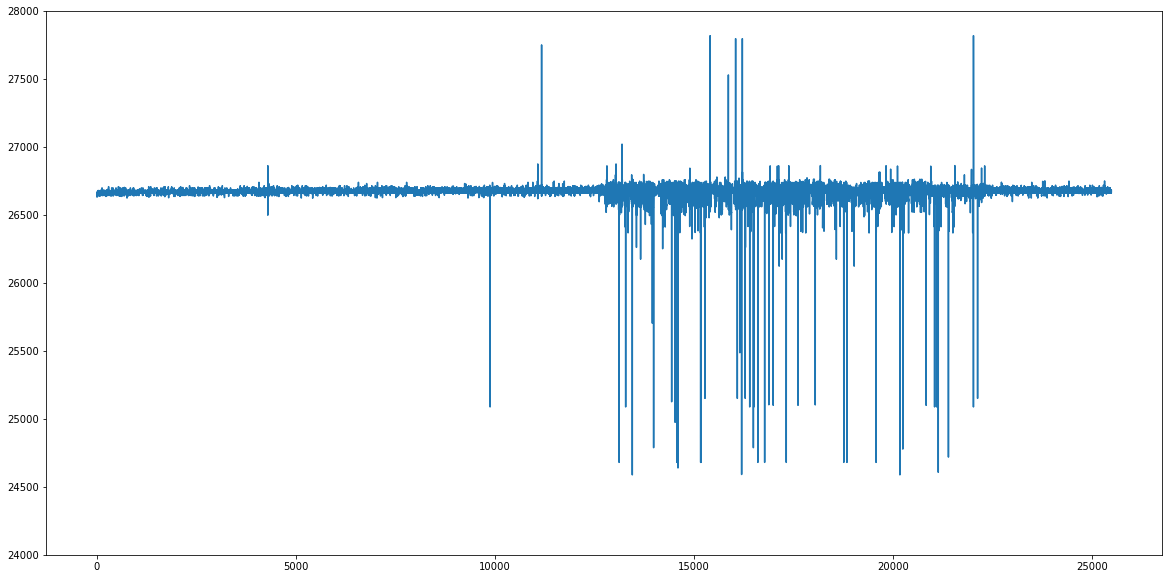

In [33]:
# df = df.iloc[9000:16000]
# df.reset_index(drop=True, inplace=True)
df['RO_VALUE'].plot(subplots=True, figsize=(20,10))
plt.ylim(18000,22000)
plt.show()

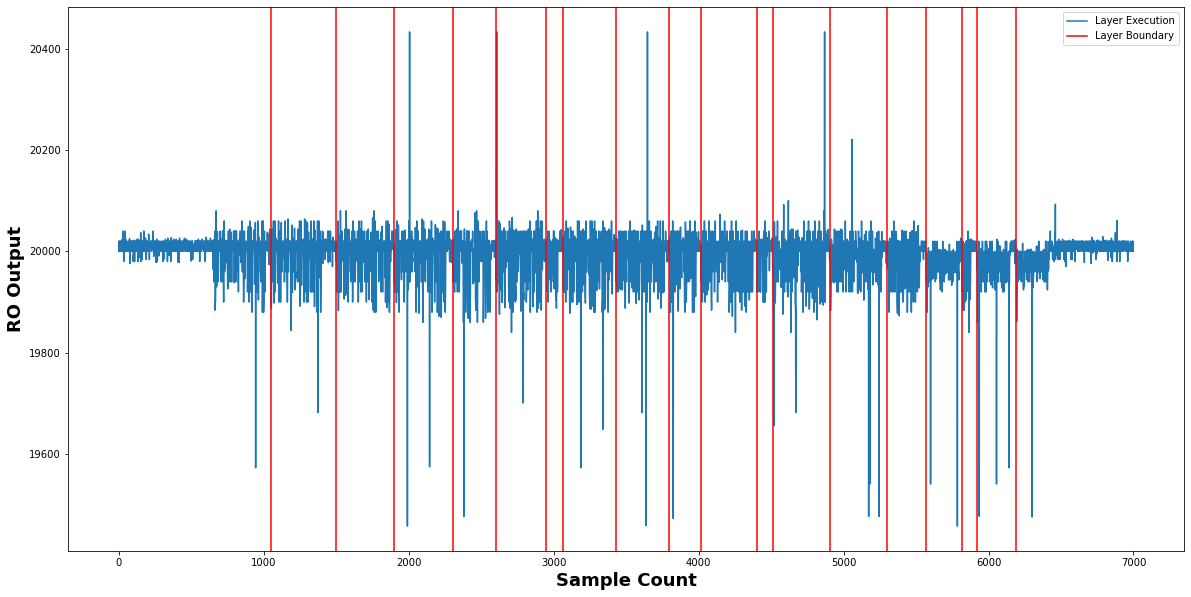

In [30]:
plt.figure(figsize=(20,10))
df_bound = df[df['RO_VALUE'] == 55555]
df_layer = df[df['RO_VALUE'] != 55555]

plt.plot(df_layer.index, df_layer['RO_VALUE'], label='Layer Execution')

# plt.ylim(18000,22000)
for index, row in df_55555[:-1].iterrows():
    plt.axvline(x=index, color='red', linestyle='-')
plt.axvline(x=df_55555.index[-1], color='red', linestyle='-', label='Layer Boundary')

plt.xlabel('Sample Count',fontsize=18, fontweight='bold')
plt.ylabel('RO Output',fontsize=18,fontweight='bold')
# plt.scatter(df_55555.index, df_55555['RO_VALUE'], color='red', label='Layer Boundary')
plt.legend()
plt.show()

In [64]:
mean_value = df['RO_VALUE'].mean()
threshold = 1.2  # You can adjust this threshold as needed
high_values_mask = df['RO_VALUE'] < (mean_value * threshold)

In [65]:
cumulative_sum = high_values_mask.cumsum()
start_index = cumulative_sum[cumulative_sum > 0].idxmin()
end_index = cumulative_sum[cumulative_sum > 0].idxmax()
middle_chunk = df.iloc[start_index:end_index + 1]

In [68]:
end

0

,RO_VALUE,LAYER_OR_BOUNDARY
0,19980,layer
1,19960,layer
2,19966,layer
3,19980,layer
4,20000,layer
...,...,...
8891,20000,layer
8892,19984,layer
8893,19999,layer
8894,20000,layer


In [5]:
def extract_features(window, only_stat=False):
    features = {}
    
    features['mean'] = window.mean()
    features['std'] = window.std()
    features['median'] = np.median(window)
    
    if only_stat == True:
        return pd.Series(features)
        
    
    # Discrete Wavelet Transform (DWT) using pywt library
    coeffs = pywt.dwt(window, 'db4')
    features['cA'] = np.mean(coeffs[0])  # Approximation coefficients
    features['cD'] = np.mean(coeffs[1])  # Detail coefficients
    
    return pd.Series(features)

In [20]:
outer_window_size = 1000
inner_window_size = 50
n_clusters = 2  # Number of clusters for KMeans
stride = 1
predictions = []
kmeans = KMeans(n_clusters=n_clusters)


windows = [df['RO_VALUE'].iloc[i:i+outer_window_size] for i in range(0, len(df)-outer_window_size+1, stride)]
features_df = pd.DataFrame([extract_features(window) for window in windows])

medians = features_df['median']

normalized_features = (features_df - features_df.mean()) / features_df.std()

normalized_features['median'] = medians

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(normalized_features)



/home/srchand/anaconda3/envs/tvm-build-il-2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
middle_index = len(cluster_labels)//2
middle_cluster = cluster_labels[middle_index - len(cluster_labels)//8:middle_index + len(cluster_labels)//3]
exec_cluster = 0
if np.sum(middle_cluster == 1) > np.sum(middle_cluster == 0):
    exec_cluster = 1


In [8]:
cluster_exec_indices = np.where(cluster_labels == exec_cluster)[0]


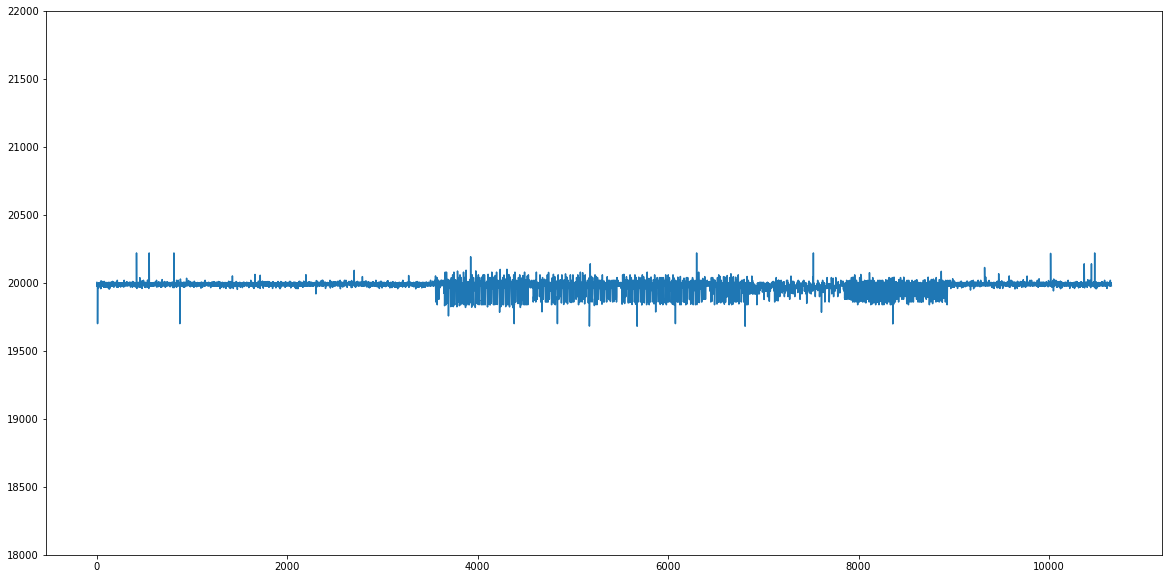

In [17]:
cluster_exec_indices = np.where(cluster_labels == exec_cluster)[0]
cluster_exec_indices=np.concatenate((cluster_exec_indices,range(cluster_exec_indices[-1],cluster_exec_indices[-1]+outer_window_size)))
# exec_data = df.iloc[cluster_exec_indices+outer_window_size/2]
exec_data = df.iloc[cluster_exec_indices]
exec_data.reset_index(drop=True, inplace=True)
exec_data['RO_VALUE'].plot(subplots=True, figsize=(20,10))
plt.ylim(18000,22000)
plt.show()

In [212]:
help(pd.write_csv)

AttributeError: module 'pandas' has no attribute 'write_csv'

<AxesSubplot:>

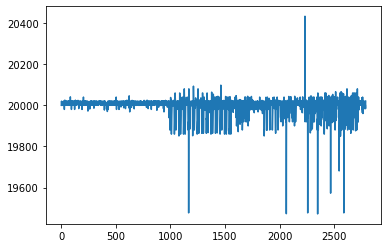

In [86]:
predictions = np.array(predictions)
minority_cluster = 0
if np.sum(predictions == 1) < np.sum(predictions == 0):
    minority_cluster = 1

cluster_min_indices = np.where(predictions == minority_cluster)[0]
cluster_min_indices=np.concatenate((cluster_min_indices,range(cluster_min_indices[-1],cluster_min_indices[-1]+250)))
exec_data = df.iloc[cluster_min_indices]
exec_data.reset_index(drop=True, inplace=True)
exec_data.plot()

In [134]:
cluster_labels = cluster_labels[12500:27000]

In [152]:
inner_window_size = 100
predictions = []
for i in range(len(cluster_labels) - inner_window_size + 1):
    window_cluster_labels = cluster_labels[i:i + inner_window_size]
    majority_class = max(set(window_cluster_labels), key=window_cluster_labels.tolist().count)

    # Step 6: Label items in the sliding window
    predictions.extend([majority_class])

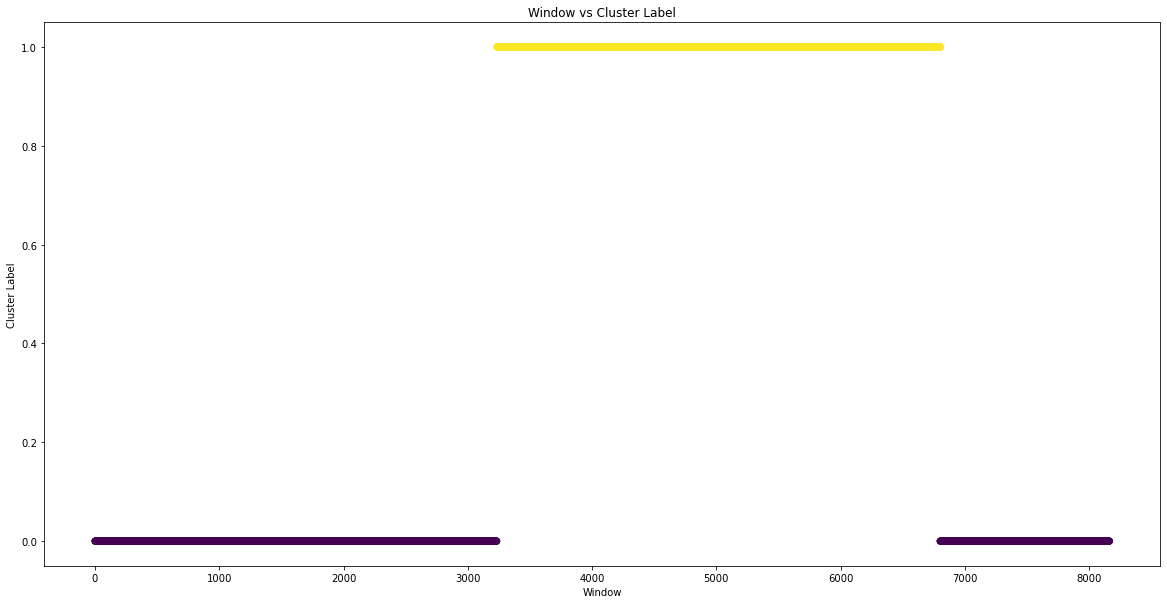

In [21]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(cluster_labels)), cluster_labels, c=cluster_labels, cmap='viridis')
plt.xlabel('Window')
plt.ylabel('Cluster Label')
plt.title('Window vs Cluster Label')
plt.show()

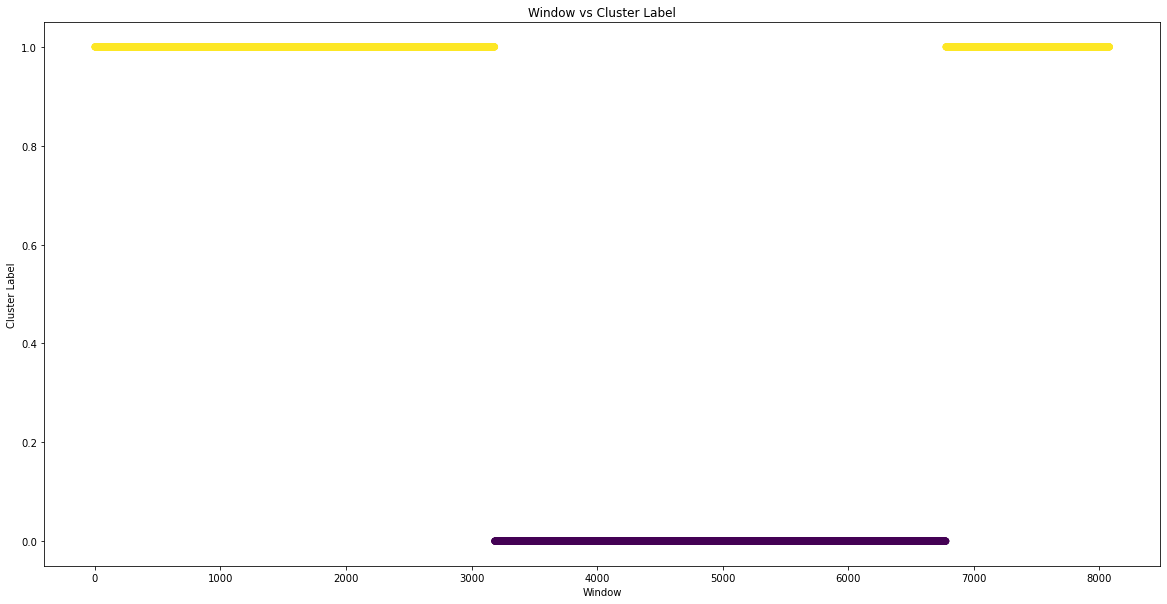

In [153]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(predictions)), predictions, c=predictions, cmap='viridis')
plt.xlabel('Window')
plt.ylabel('Cluster Label')
plt.title('Window vs Cluster Label')
plt.show()

In [11]:
def find_first_occ(arr, check_element=0):
    for i, val in enumerate(arr):
            if val == check_element:
                return i
    return -1

In [12]:
def count_contig(arr, check_element=0):
    regions = 0
    curr_value = arr[0]
    first_occ = 0
    if curr_value != check_element:
        first_occ = find_first_occ(arr,check_element)
        
    curr_value = arr[first_occ]
    in_region = False
    for i in range(first_occ,len(arr)):
        if arr[i] == check_element:
            if not in_region:
                regions += 1
                in_region = True
        else:
            in_region = False
    
    return regions
            
            
                
    

In [138]:
count_contig(predictions,0)

20